In [1]:
import cv2 as cv
print(cv.__version__)

import numpy as np
print(np.__version__)

import matplotlib.pyplot as plt

4.10.0
1.26.4


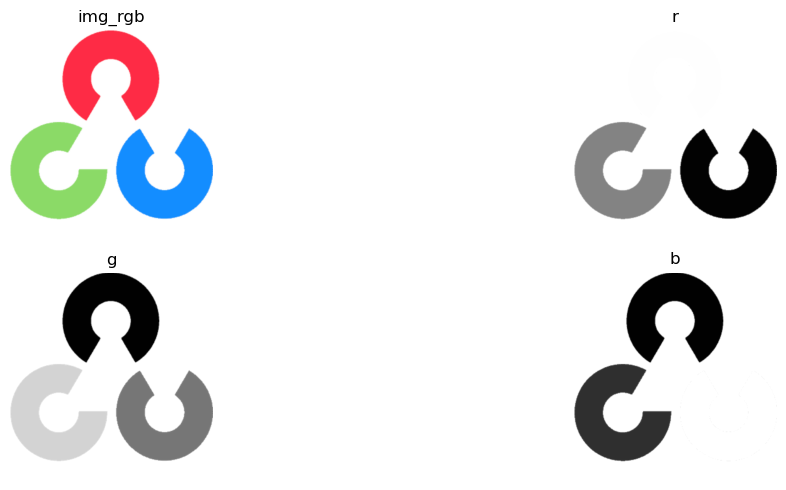

In [2]:
img = cv.imread("open_logo.png")
# 如果图像路径错误或文件不存在，cv.imread() 会返回 None
if img is None:
    # 打印错误信息
    print("Error: Could not load image.")
    # 退出程序
    exit()

# 转换为 RGB 格式以便正确显示颜色
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# 分离 R, G, B 通道
r, g, b = cv.split(img_rgb)

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
# 显示每个图像
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title('img_rgb')
axes[0, 0].axis('off')  # 隐藏坐标轴

axes[0, 1].imshow(r, cmap='gray')
axes[0, 1].set_title('r')
axes[0, 1].axis('off')

axes[1, 0].imshow(g, cmap='gray')
axes[1, 0].set_title('g')
axes[1, 0].axis('off')

axes[1, 1].imshow(b, cmap='gray')
axes[1, 1].set_title('b')
axes[1, 1].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

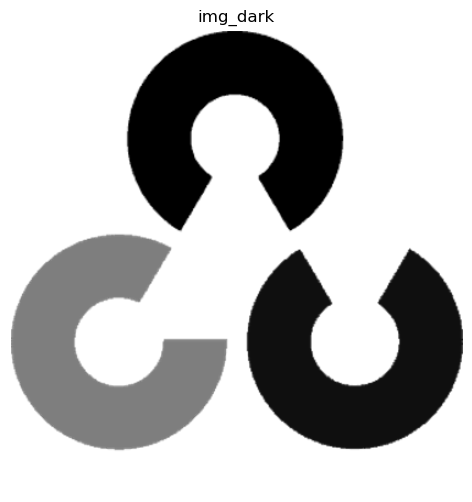

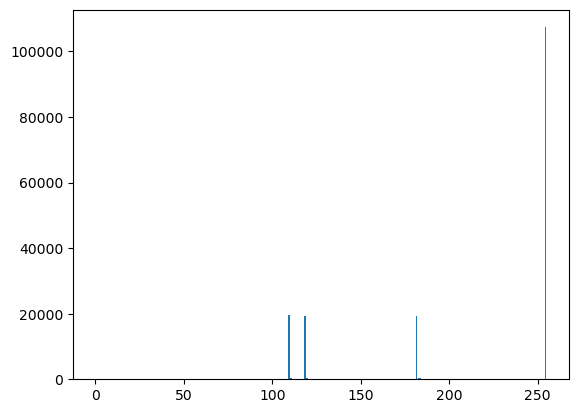

In [7]:
img_dark = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
plt.figure(figsize=(8, 6))
plt.imshow(img_dark, cmap='gray')
plt.title('img_dark')
plt.axis('off')
plt.show()

hist = plt.hist(img_dark.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

In [54]:
def deepen_green(image, green_saturation_gain=1.5, green_value_gain=1.2):
    """
    加深图像中的绿色，其他颜色保持不变
    :param image: 输入BGR图像（OpenCV读取）
    :param green_saturation_gain: 绿色区域饱和度提升倍数（>1加深，1不变）
    :param green_value_gain: 绿色区域明度提升倍数（>1更亮，可根据需求调整）
    :return: 处理后的BGR图像
    """
    # 1. 转换为HSV颜色空间（H:色调，S:饱和度，V:明度）
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    
    # 2. 定义绿色的HSV范围（可根据实际需求微调）
    # HSV范围说明：H(0-179), S(0-255), V(0-255)
    # 绿色的H值约为40-70，可根据场景调整上下限
    lower_green = np.array([40, 40, 40])   # 绿色下限
    upper_green = np.array([70, 255, 255]) # 绿色上限
    
    # 3. 创建绿色区域的掩码（mask：绿色区域为255，非绿色为0）
    green_mask = cv.inRange(hsv, lower_green, upper_green)
    
    # 4. 分离HSV通道，单独处理绿色区域
    h, s, v = cv.split(hsv)


    # # 提升绿色区域的色度（H通道）：仅对掩码内的像素生效
    # h[green_mask > 0] = np.clip(s[green_mask > 0] * 1.05, 0, 255)
    # 提升绿色区域的饱和度（S通道）：仅对掩码内的像素生效
    s[green_mask > 0] = np.clip(s[green_mask > 0] * green_saturation_gain, 0, 255)
    # 提升绿色区域的明度（V通道）：可选，若需要更鲜艳的绿色可保留
    v[green_mask > 0] = np.clip(v[green_mask > 0] * green_value_gain, 0, 255)
    
    # 5. 合并处理后的HSV通道
    hsv_processed = cv.merge([h, s, v])
    
    # 6. 转回BGR空间
    result = cv.cvtColor(hsv_processed, cv.COLOR_HSV2BGR)
    
    # 7. 仅替换绿色区域，非绿色区域保留原始图像（可选，确保非绿色完全不变）
    # 创建反向掩码（非绿色区域）
    non_green_mask = cv.bitwise_not(green_mask)
    # 提取原始图像的非绿色区域
    non_green_part = cv.bitwise_and(image, image, mask=non_green_mask)
    # 提取处理后的绿色区域
    green_part = cv.bitwise_and(result, result, mask=green_mask)
    # 合并最终结果
    final_result = cv.add(non_green_part, green_part)
    
    return final_result

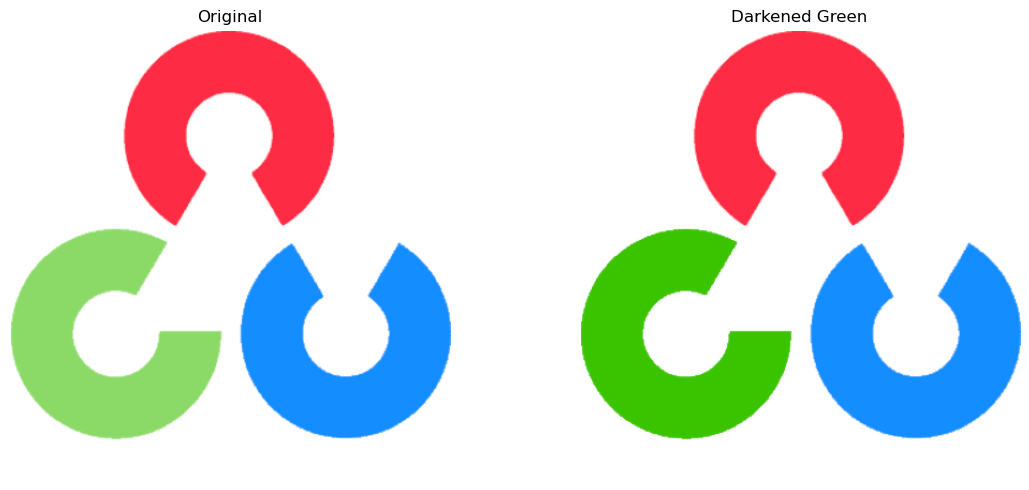

In [58]:
green_saturation_gain = 2.1
green_value_gain = 0.9
img_rgb_darken_green = deepen_green(img_rgb, green_saturation_gain, green_value_gain)

# 创建子图比较原图和处理后的图
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(img_rgb_darken_green)
axes[1].set_title('Darkened Green')
axes[1].axis('off')

plt.tight_layout()
plt.show()


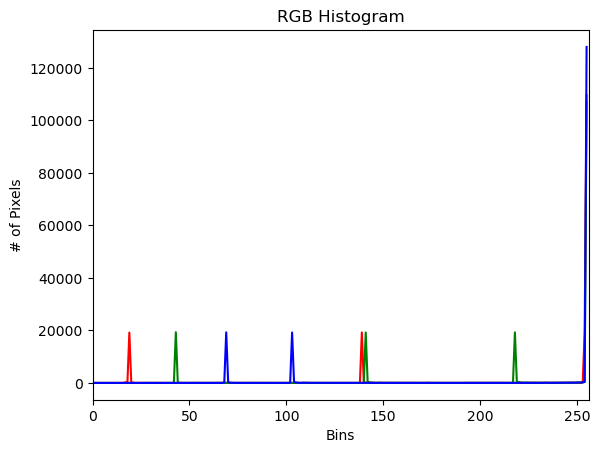

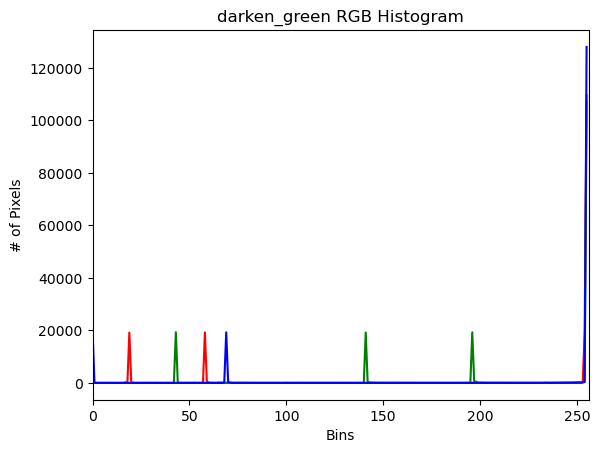

In [57]:
# 分离RGB通道
channels = cv.split(img_rgb)
colors = ('r', 'g', 'b')

# 创建一个新的图形窗口
plt.figure()
plt.title("RGB Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 循环处理每个通道
for (channel, color) in zip(channels, colors):
    # 计算当前通道的直方图
    hist = cv.calcHist([channel], [0], None, [256], [0, 256])
    
    # 在图表上绘制直方图
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

# 显示最终结果
plt.show()


# 加深后图片
channels = cv.split(img_rgb_darken_green)
colors = ('r', 'g', 'b')
# 创建一个新的图形窗口
plt.figure()
plt.title("darken_green RGB Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 循环处理每个通道
for (channel, color) in zip(channels, colors):
    # 计算当前通道的直方图
    hist = cv.calcHist([channel], [0], None, [256], [0, 256])
    
    # 在图表上绘制直方图
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

# 显示最终结果
plt.show()